In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/Users/sahilagrawal/Documents/IT/Data Analytics/Project/Data/realannualcommoditybasedexchangerates_1_.csv")
full_df = pd.read_csv("/Users/sahilagrawal/Documents/IT/Data Analytics/Project/Data/full-data.csv")
df.head()

,Commodity,Weights,Year,Value
0,Bulk,U.S. competitors (country export weights),1970,83.473526
1,Consumer oriented,U.S. competitors (country export weights),1970,92.983032
2,Intermediates,U.S. competitors (country export weights),1970,92.361221
3,Beef and beef products,U.S. competitors (country export weights),1970,87.351936
4,Competitor agricultural exports to the world,U.S. competitors (country export weights),1970,80.954834


In [3]:
print(df.isna().values.sum())

0


In [4]:
full_df.head()

,Year,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,...,10 Yr,20 Yr,30 Yr,GDP growth,Commodity_x,Weights_x,Value_x,Commodity_y,Weights_y,Value_y
0,1990,NaN,NaN,7.74648,NaN,7.853,7.88724,8.1616,8.25764,8.37328,...,8.5524,NaN,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Bulk,U.S. competitors (country export weights),86.274719
1,1990,NaN,NaN,7.74648,NaN,7.853,7.88724,8.1616,8.25764,8.37328,...,8.5524,NaN,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Consumer oriented,U.S. competitors (country export weights),86.054863
2,1990,NaN,NaN,7.74648,NaN,7.853,7.88724,8.1616,8.25764,8.37328,...,8.5524,NaN,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Intermediates,U.S. competitors (country export weights),84.863716
3,1990,NaN,NaN,7.74648,NaN,7.853,7.88724,8.1616,8.25764,8.37328,...,8.5524,NaN,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Beef and beef products,U.S. competitors (country export weights),84.718597
4,1990,NaN,NaN,7.74648,NaN,7.853,7.88724,8.1616,8.25764,8.37328,...,8.5524,NaN,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Competitor agricultural exports to the world,U.S. competitors (country export weights),89.298264


In [7]:
full_df['Weights_x'].value_counts()

U.S. markets (U.S. export weights)           67932
U.S. competitors (country export weights)    62900
U.S. suppliers (U.S. import weights)         55352
Name: Weights_x, dtype: int64

In [4]:
#Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


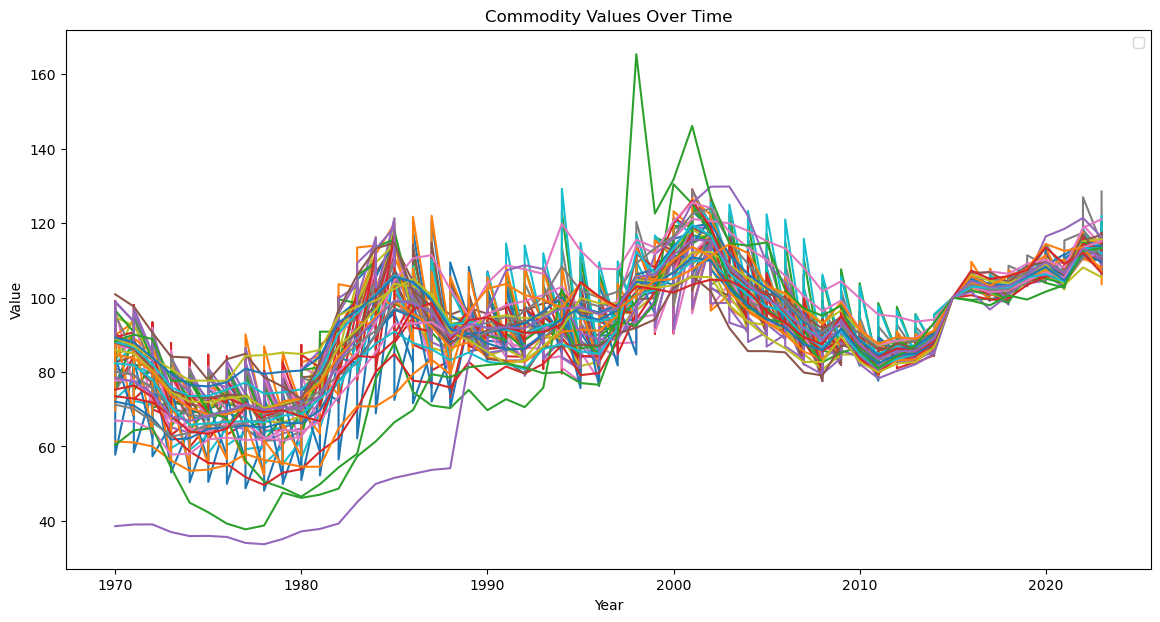

In [17]:
plt.figure(figsize=(14, 7))
for commodity in df['Commodity'].unique():
    subset = df[df['Commodity'] == commodity]
    plt.plot(subset['Year'], subset['Value'])
    
plt.title('Commodity Values Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

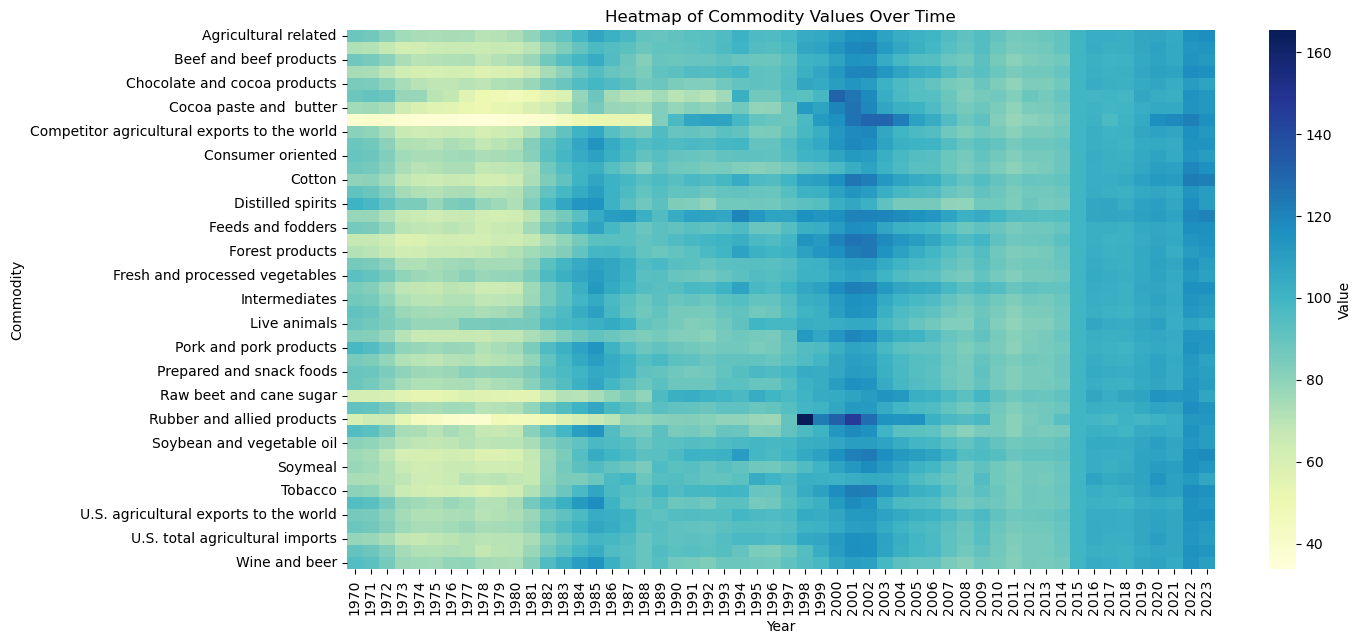

In [21]:
#Heatmap
pivot_table = pivot_table.fillna(0)

# Plot the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap="YlGnBu", cbar_kws={'label': 'Value'})
plt.title('Heatmap of Commodity Values Over Time')
plt.show()

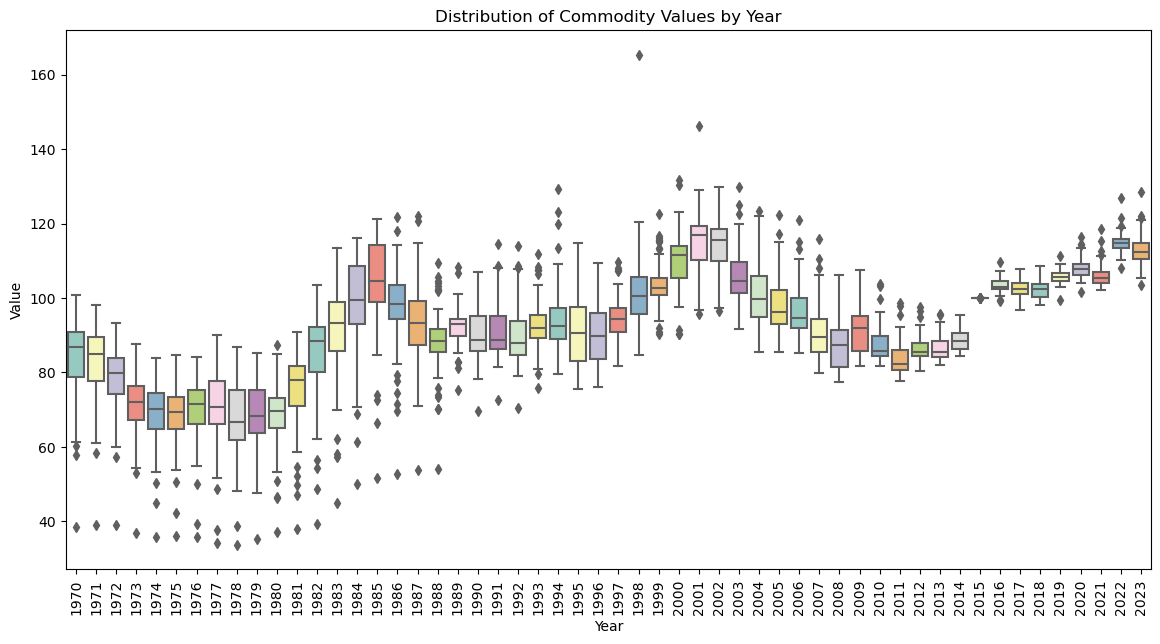

In [23]:
#Box plot over years
plt.figure(figsize=(14, 7))
sns.boxplot(x='Year', y='Value', data=df, palette="Set3")
plt.title('Distribution of Commodity Values by Year')
plt.xticks(rotation=90)
plt.show()


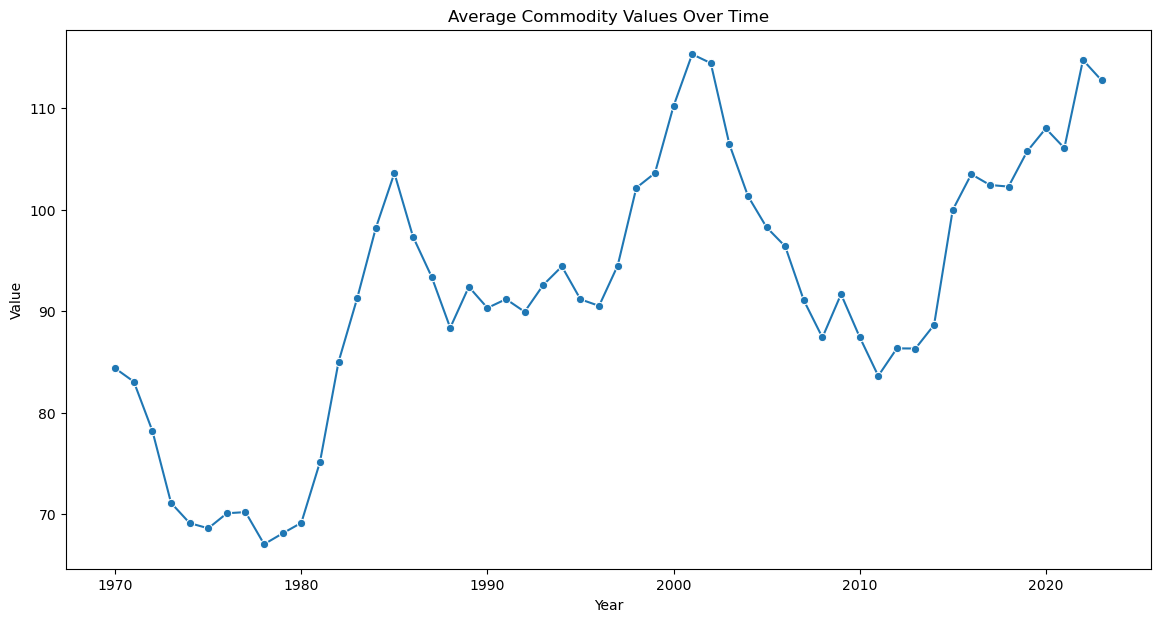

In [24]:
yearly_avg = df.groupby('Year')['Value'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Value', data=yearly_avg, marker='o')
plt.title('Average Commodity Values Over Time')
plt.show()


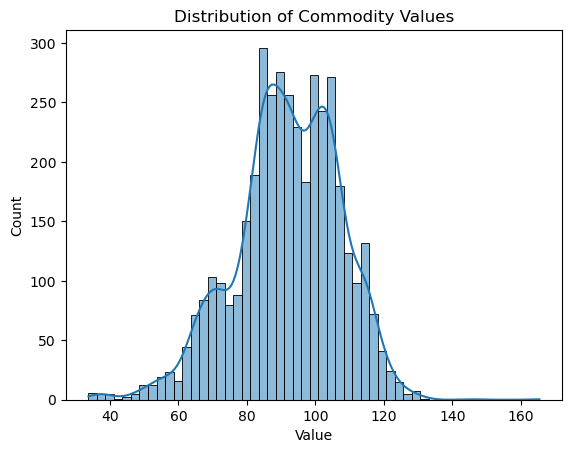

In [25]:
sns.histplot(df['Value'], kde=True)
plt.title('Distribution of Commodity Values')
plt.show()

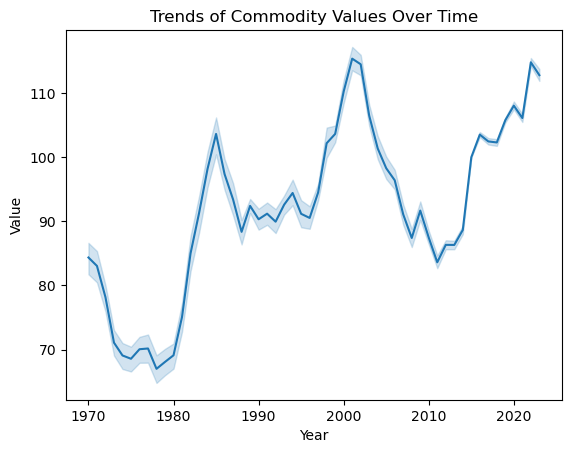

In [27]:
sns.lineplot(x='Year', y='Value', data=df)
plt.title('Trends of Commodity Values Over Time')
plt.show()